<a href="https://colab.research.google.com/github/ElsiSahayaRenita/Machine_Learning/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("/content/train.csv")
df.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8


In [4]:
d = pd.read_csv("/content/test.csv")
d.shape

(105, 14)

In [5]:
print(df.shape)
df.dtypes

(400, 15)


ID           int64
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [6]:
df.isnull().sum()            #sum of null values

ID         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
df.describe()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,3.757191,10.970000,10.936425,0.072500,0.552817,6.292165,68.086000,3.819462,9.462500,403.797500,18.459000,359.455375,12.668525,22.475750
std,115.614301,9.155496,22.796261,6.848042,0.259639,0.115488,0.709923,28.386888,2.132445,8.687478,169.656816,2.148105,86.732906,7.207047,9.218611
min,0.000000,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.920000,5.000000
25%,99.750000,0.077820,0.000000,5.130000,0.000000,0.449000,5.877500,42.375000,2.109150,4.000000,277.000000,17.400000,376.115000,6.990000,17.100000
50%,199.500000,0.242170,0.000000,8.560000,0.000000,0.532000,6.208500,76.950000,3.272100,5.000000,329.000000,18.950000,391.575000,10.875000,21.000000
75%,299.250000,3.543427,12.500000,18.100000,0.000000,0.624000,6.620500,93.825000,5.214600,24.000000,666.000000,20.200000,396.285000,16.910000,25.000000
max,399.000000,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


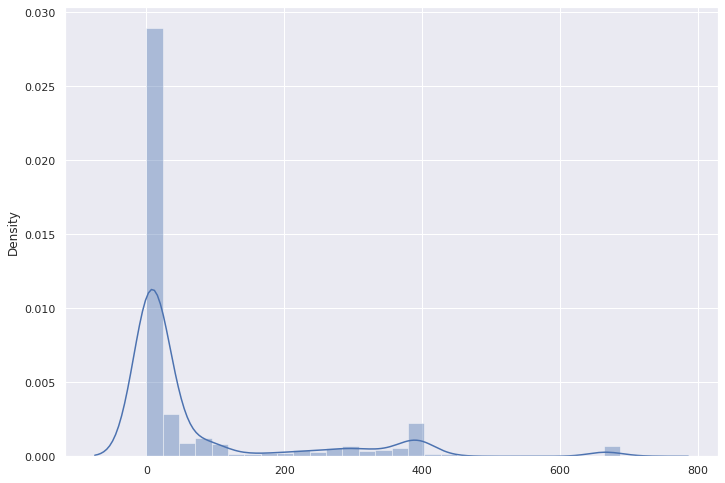

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df, bins=30)
plt.show()

As the dataframe df shows the normal distributions with some outliers. 

In [9]:
#import phi from train dataset using  NumPy's loadtxt function
phi = np.loadtxt('/content/train.csv',  dtype='float', delimiter=',', skiprows=1, usecols=tuple(range(1, 14)))

In [10]:
#import phi_test from  test datasets using NumPy's loadtxt function
phi_test = np.loadtxt('/content/test.csv', dtype='float', delimiter=',', skiprows=1, usecols=tuple(range(1, 14)))

In [11]:
#Import y from train dataset using the loadtxt function
y = np.loadtxt('/content/train.csv', dtype='float', delimiter=',', skiprows=1, usecols=14)

In [12]:
#Concatenate column of 1s to right of phi and phi_test
phi_test = np.concatenate((phi_test, np.ones((105, 1))), axis=1)
phi = np.concatenate((phi, np.ones((400, 1))), axis=1)

In [13]:
#Apply min max scaling on each coloumn of phi and phi_test
# X_rescaled = (X - X_min)/(X_max - X_min)
for x in range(0, 13):
  max=np.max(phi[:, x])
  min=np.min(phi[:, x])
  phi[:, x]=(phi[:, x] - min) / (max - min)
  phi_test[:, x] = (phi_test[:, x] - min) / (max - min)

In [14]:
#Apply log scaling on y
y = np.log(y)

In [15]:
#Define a function to calculate change in error function based on phi, w and p norm
def change_error(p, phi, w):
    if p == 2:
      change_error= (2 * (np.dot(np.dot(np.transpose(phi), phi), w) -
                       np.dot(np.transpose(phi), y)) + lamb * p * np.power(np.absolute(w), (p - 1)))
    if p < 2 and p > 1:
      change_error = (2 * (np.dot(np.dot(np.transpose(phi), phi), w) -
                       np.dot(np.transpose(phi), y)) +lamb * p * np.power(np.absolute(w), (p - 1)) * np.sign(w))
    return change_error

In [16]:
#Make a dictionary containing filenames as keys and p as values
dicfile = { 'result_0.csv' :2.0, 'result_1.csv' : 1.75, 'result_2.csv' : 1.5, 'result_3.csv' : 1.3  }

In [19]:
#For each item in this dictionary
for (fame, p) in dicfile.items():
    # Set the w to all 0s
    w = np.zeros((14, 1))

    # Hyperparameter lambda value
    lamb = 0.2

    # Maximum step size
    t = 0.00012

    # Calculate new value of w
    w_1 =  w - t *  change_error(p, phi, w)

    i = 0
    # Repeat steps until error between consecutive w is less than threshold
    while(np.linalg.norm(w_1 - w) > 10 ** -10):
        w = w_1
        w_1 = w - t * change_error(p, phi, w)
        i = i + 1

    # Load values of id
    id_test = np.loadtxt('test.csv', dtype='int', delimiter=',',
                         skiprows=1, usecols=0, ndmin=2)

    # Calculate y for test data
    y_test = np.exp(np.dot(phi_test, w_1))



In [22]:
y_test

array([[7.30218874e-001, 3.07907180e-001, 3.25017056e-002, ...,
        1.77561290e-004, 7.48581219e-002, 8.07665206e-005],
       [7.27421514e-001, 3.15432209e-001, 3.62418105e-002, ...,
        2.43616944e-004, 8.08275817e-002, 1.14395332e-004],
       [3.02685604e-002, 2.47145963e-006, 5.94996341e-017, ...,
        1.56939952e-041, 5.16224569e-013, 3.02157114e-045],
       ...,
       [1.98303391e+000, 1.24144723e+001, 1.45197400e+003, ...,
        8.86896000e+007, 2.48316357e+002, 4.69139570e+008],
       [1.06547191e+001, 5.82955983e+003, 7.39887735e+010, ...,
        2.01390245e+027, 1.71804817e+008, 6.13926644e+029],
       [3.89941409e-004, 2.75358624e-013, 4.76029634e-037, ...,
        4.79901021e-092, 3.09374743e-028, 2.33227752e-100]])